# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Regression Model Evaluation

In [3]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [6]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [7]:
from sklearn.linear_model import LinearRegression as LinReg

linear_regression=LinReg()

In [8]:
linear_regression.fit(X_train, y_train)

LinearRegression()

In [9]:
linear_regression.coef_ #son las betas

array([[-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,
         2.78443820e+00, -1.72026334e+01,  4.43883520e+00,
        -6.29636221e-03, -1.44786537e+00,  2.62429736e-01,
        -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
        -5.08571424e-01]])

## 3. Calculate and print R-squared for both the training and the testing set.

In [10]:
y_pred_test = linear_regression.predict(X_test)
y_pred_train = linear_regression.predict(X_train)

In [11]:
from sklearn import metrics

coef_test= metrics.r2_score(y_test, y_pred_test)
print('r2 error test set' , coef_test)
coef_train = metrics.r2_score(y_train, y_pred_train)
print('r2 error train set' , coef_train)

r2 error test set 0.6687594935356278
r2 error train set 0.7508856358979673


## 4. Calculate and print mean squared error for both the training and the testing set.

In [12]:
error_test= metrics.mean_squared_error(y_test, y_pred_test)
print('mean squared error test set' , error_test)
error_train= metrics.mean_squared_error(y_train, y_pred_train)
print('mean squared error train set' , error_train)

mean squared error test set 24.291119474973826
mean squared error train set 21.641412753226312


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [13]:
mean_abs_test= metrics.mean_absolute_error(y_test, y_pred_test)
print('mean absolute error test set' , mean_abs_test)

mean_abs_train= metrics.mean_absolute_error(y_train, y_pred_train)
print('mean absolute error train set' , mean_abs_train)

mean absolute error test set 3.189091965887877
mean absolute error train set 3.3147716267832283


## Classification Model Evaluation

In [14]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

In [15]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [17]:
data['class'].value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [18]:
X=data.drop('class', axis=1)

y=data['class']

In [19]:
X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=42)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [20]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [21]:
logistic.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred_test= logistic.predict(X_test)
y_pred_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [23]:
y_pred_train= logistic.predict(X_train)
y_pred_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix

In [25]:
acc_test = accuracy_score(y_test, y_pred_test)
print('accuracy score error test set' , acc_test)

accuracy score error test set 1.0


In [26]:
acc_train = accuracy_score(y_train, y_pred_train)
print('accuracy score error train set' , acc_train)

accuracy score error train set 0.975


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [27]:
from sklearn.metrics import balanced_accuracy_score

In [31]:
balanced_acc_test= balanced_accuracy_score(y_test, y_pred_test)
balanced_acc_test

1.0

In [33]:
balanced_acc_train = balanced_accuracy_score(y_train, y_pred_train)
balanced_acc_train

0.975609756097561

## 10. Calculate and print the precision score for both the training and the testing set.

In [30]:
from sklearn.metrics import precision_score

In [34]:
precision_score_test = precision_score(y_test, y_pred_test, average='macro')
precision_score_test

1.0

In [35]:
precision_score_train = precision_score(y_train, y_pred_train, average='macro')
precision_score_train

0.9761904761904763

## 11. Calculate and print the recall score for both the training and the testing set.

In [36]:
from sklearn.metrics import recall_score as re

In [41]:
recall_score_test= recall_score(y_test, y_pred_test, average = "macro")
recall_score_test

1.0

In [42]:
recall_score_train= recall_score(y_train, y_pred_train, average = "macro")
recall_score_train

0.975609756097561

## 12. Calculate and print the F1 score for both the training and the testing set.

In [43]:
from sklearn.metrics import f1_score as f1

In [45]:
f1_test= f1(y_test, y_pred_test, average='macro')
f1_test

1.0

In [46]:
f1_train= f1(y_train, y_pred_train, average='macro')
f1_train

0.9749960931395533

## 13. Generate confusion matrices for both the training and the testing set.

In [57]:
from sklearn.metrics import confusion_matrix as cm
import seaborn as sns
import pylab as plt

In [56]:
cm(y_test, y_pred_test)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

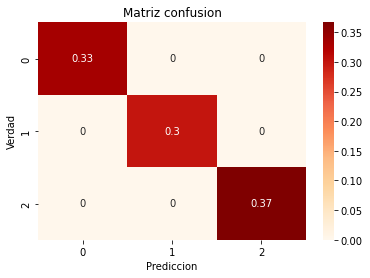

In [53]:
ax=sns.heatmap(cm(y_test, y_pred_test)/sum(sum(cm(y_test, y_pred_test))), annot=True, cmap= 'OrRd')

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

In [55]:
cm(y_train, y_pred_train)

array([[40,  0,  0],
       [ 0, 38,  3],
       [ 0,  0, 39]], dtype=int64)

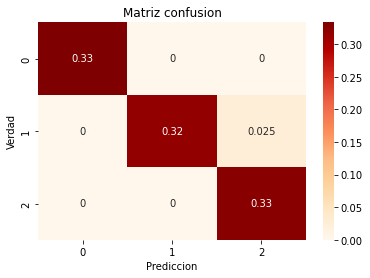

In [58]:
ax=sns.heatmap(cm(y_train, y_pred_train)/sum(sum(cm(y_train, y_pred_train))), annot=True, cmap= 'OrRd')

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.